In [19]:
'''Entry point for the particle filtering code '''

import sys
sys.path.append('../')
import numpy as np

from Implementations.algorithms.TimeDependentBeta import TimeDependentAlgo
from Implementations.resamplers.resamplers import PoissonResample,NBinomResample
from Implementations.solvers.DeterministicSolvers import LSODACalvettiSolver,LSODASolver,LSODASolverSEIARHD
from Implementations.perturbers.perturbers import MultivariatePerturbations
from utilities.Utils import Context,ESTIMATION
from functools import partial


'''Algorithm object encapsulating all the requirements

The integrator is an object which runs the t->t+1 propagation of the particles, primarily using the LSODA 
integrator built in to scipy.integrate(solve_ivp)

The perturb object performs multivariate perturbations on the state variables and the estimated variables

The resampler computes the weights and resamples based on a known algorithm(multinomial,systematic,residual)



'''
algo = TimeDependentAlgo(integrator = LSODASolver(),
                        perturb = MultivariatePerturbations(hyper_params={"h":0.5,"sigma1":0.05,"sigma2":0.1}),
                        resampler = NBinomResample(),
                        ctx=Context(sankey_indices = [],
                                    population=7_700_000,
                                    state_size = 4,
                                    prior_weights=np.zeros(1000),
                                    pos_weights = np.zeros(1000),
                                    weight_ratio=np.ones(1000),
                                    seed_loc=[1],
                                    seed_size=0.005,
                                    forward_estimation=1,
                                    rng=np.random.default_rng(),
                        particle_count=10))

algo.initialize(params={
"beta":ESTIMATION.VARIABLE,
"gamma":0.06,
"mu":0.004,
"q":0.1,
"eta":1/7,
"std":10,
"R":50,
"hosp":ESTIMATION.STATIC,
"L":90,
"D":10,
}
,priors={"beta":partial(algo.ctx.rng.uniform,0.1,0.6), 
          "gamma":partial(algo.ctx.rng.uniform,0,1/7),
          "eta":partial(algo.ctx.rng.uniform,1/15,1/3),
          "hosp":partial(algo.ctx.rng.uniform,5,20),
          "D":partial(algo.ctx.rng.uniform,0,20)
          })

'''Runs the PF over the specified data set for the specified length of time'''

#algo.print_particles()
algo.run(f'../datasets/WA_FLU_HOSPITALIZATIONS.csv',150)



/home/andrew/.local/lib/python3.11/site-packages/scipy/integrate/_ivp/common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `jac`.
  warn("The following arguments have no effect for a chosen solver: {}."


Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
It

func:'run' args:[(<Implementations.algorithms.TimeDependentBeta.TimeDependentAlgo object at 0x7faef57ee5d0>, '../datasets/WA_FLU_HOSPITALIZATIONS.csv', 150), {}] took: 3.0049 sec


Array 1: [0 1 2 3 4 5 6 7 8 9] ...
Array 2: [7 6 5 9 6 5 2 7 1 9] ...
Array 3: [2 2 5 6 4 2 2 1 0 9] ...
Array 4: [0 2 8 3 0 8 8 1 0 5] ...
Array 5: [8 2 3 5 3 8 6 4 6 3] ...
Array 6: [6 2 6 5 5 9 4 6 5 1] ...
Array 7: [3 3 8 9 5 5 6 0 9 7] ...
Array 8: [5 1 5 6 6 8 7 5 3 2] ...
Array 9: [9 9 3 2 5 4 1 5 8 3] ...
Array 10: [5 8 4 1 7 8 1 2 1 1] ...


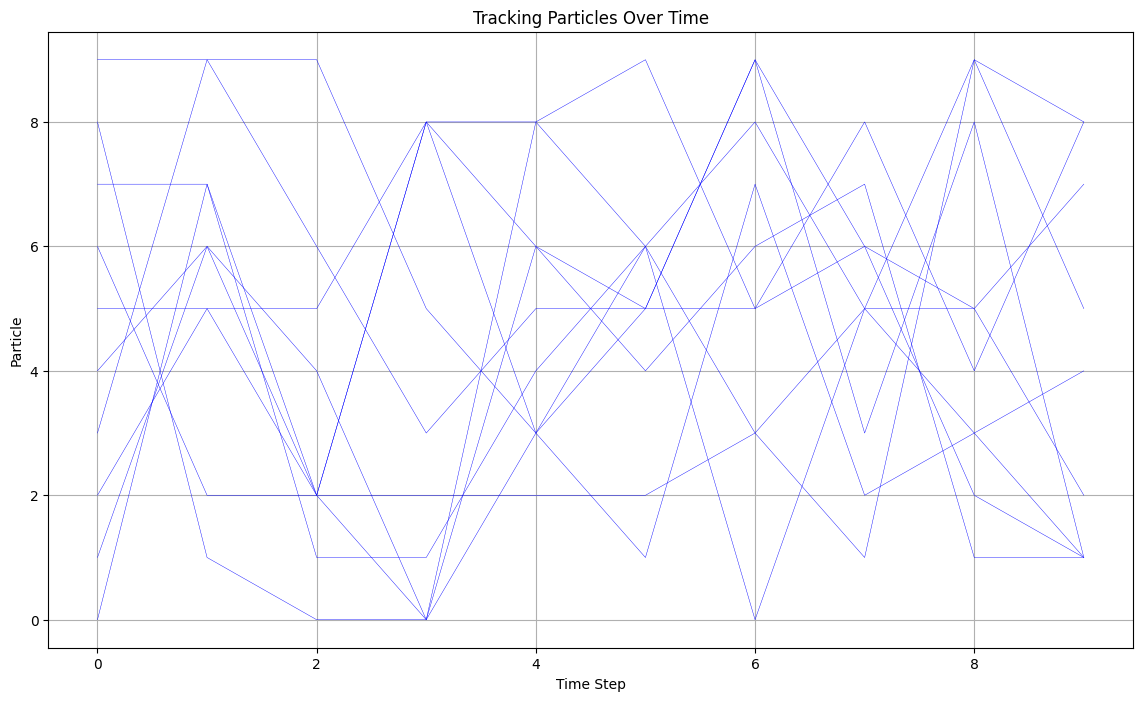

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Dummy data
lists_of_integers = [
    np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
    np.array([1, 3, 5, 6, 8, 9, 9, 7, 8, 0]),
    np.array([6, 0, 0, 3, 2, 3, 5, 7, 3, 5]),
    np.array([3, 5, 5, 3, 5, 8, 5, 5, 5, 5]),
    np.array([1, 1, 1, 1, 1, 1, 1, 1, 8, 1]),
    np.array([2, 2, 3, 7, 5, 2, 2, 5, 4, 2]),
    np.array([5, 5, 0, 5, 5, 5, 5, 5, 5, 5]),
    np.array([7, 0, 0, 5, 8, 8, 7, 9, 9, 7]),
    np.array([0, 4, 6, 0, 4, 0, 4, 4, 6, 1]),
    np.array([2, 2, 3, 3, 5, 9, 0, 9, 2, 2]),
]

num_arrays = 10
num_integers = 10

# Generating the arrays
dummy_data = [np.arange(num_integers)]  # Starting array
dummy_data += [np.random.randint(0, num_integers, size=num_integers) for _ in range(num_arrays - 1)]

# Print the first few elements of first few arrays for verification/debugging
for i, arr in enumerate(dummy_data):
    print(f"Array {i+1}: {arr[:10]} ...")


num_particles = len(dummy_data[0])

time_steps = np.arange(len(lists_of_integers))

plt.figure(figsize=(14, 8))

for particle in range(num_particles):
    particle_values = [dummy_data[time_step][particle] for time_step in range(len(dummy_data))]
    plt.plot(time_steps, particle_values, 'b', lw=0.3)




plt.xlabel('Time Step')
plt.ylabel('Particle')
plt.title('Tracking Particles Over Time')
plt.grid(True)
plt.show()


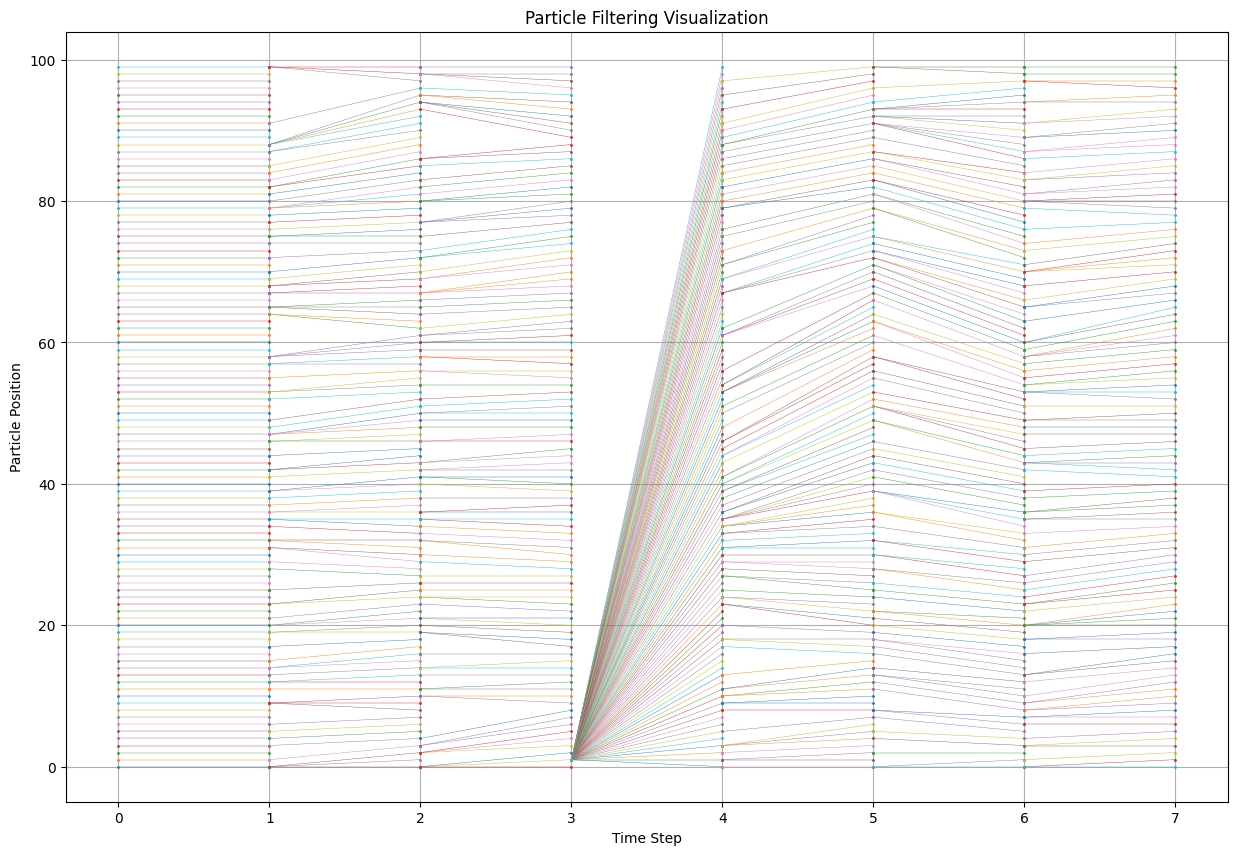

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize the plot
plt.figure(figsize=(15, 10))

# Simulate the resampling indices 
np.random.seed(0)
resampling_indices = np.array([
    np.arange(100),
    np.random.choice(np.arange(100), 100, replace=True),
    np.random.choice(np.arange(100), 100, replace=True),
    np.ones(100),
    np.random.choice(np.arange(100), 100, replace=True),
    np.random.choice(np.arange(100), 100, replace=True),
    np.random.choice(np.arange(100), 100, replace=True),
    np.random.choice(np.arange(100), 100, replace=True)
])

# sort each step's resampling indices based on the previous step
# to keep track of each particle's position 
positions = np.zeros_like(resampling_indices)
positions[0] = np.arange(100)  # Initial positions are just the particle indices

for step in range(1, len(resampling_indices)):
    order = np.argsort(resampling_indices[step-1])
    positions[step] = np.argsort(order)

for step in range(1, len(positions)):
    np.sort(resampling_indices[step])
    for p in range(100):
        plt.plot([step-1, step], [resampling_indices[step-1][p], positions[step, p]], '-o', markersize=1, linewidth=0.3)

plt.xlabel('Time Step')
plt.ylabel('Particles')
plt.title('Particle Filtering Visualization')
plt.grid(True)
plt.xticks(np.arange(len(resampling_indices)))
plt.show()
